In [23]:
# linear modelling functions
# !pip install ipynb
import ipynb.fs.full.general_model_pipeline_vl as gmp

# packages
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

#### Setting aside some testing data first:

This code uses 80% for training data, 20% for testing data.

In [2]:
# set the seed for reproducibility
np.random.seed(3)

In [3]:
data = pd.read_csv('../../data/nu3-pctfoodsupply-CO2-emissions.csv').drop(columns=['Unnamed: 0'])
data.head()

,porksupply_pct,chickensupply_pct,beefsupply_pct,lambsupply_pct,fishsupply_pct,eggsupply_pct,milkcheesesupply_pct,wheatprodsupply_pct,ricesupply_pct,soybeansupply_pct,nutssupply_pct,totalco2,Country
0,0.024475,0.090031,0.129201,0.003633,0.010153,0.026525,0.454298,0.240120,0.020423,0.000000,0.001141,2172.40,Argentina
1,0.051904,0.099164,0.072803,0.021222,0.038036,0.018298,0.504182,0.151498,0.023716,0.000409,0.018771,1938.64,Australia
2,0.020423,0.024834,0.042235,0.028758,0.007227,0.023370,0.570120,0.260244,0.014604,0.000000,0.008184,1777.84,Albania
3,0.045923,0.056891,0.028287,0.044716,0.157545,0.017446,0.478118,0.154390,0.008236,0.000233,0.008215,1731.35,Iceland
4,0.061759,0.096919,0.062313,0.052394,0.056411,0.027458,0.380278,0.213094,0.025380,0.001219,0.022775,1750.94,New Zealand


In [4]:
train_data = data.sample(frac=0.80)
test_data = data[data['Country'].apply(lambda x: x not in train_data['Country'].values)]

train_data.drop(columns='Country', inplace=True)
test_data.drop(columns='Country', inplace=True)

C:\Users\vince\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [5]:
train_data.shape, test_data.shape

((104, 12), (26, 12))

## Forecasting and Prediction Modeling (25 points)

This section is where the rubber meets the road.  In it you must:
1. Explore at least 3 prediction modeling approaches for each prediction question, ranging from the simple (e.g. linear regression, KNN) to the complex (e.g. SVM, random forests, Lasso).  
2. Motivate all your modeling decisions.  This includes parameter choices (e.g., how many folds in k-fold cross validation, what time window you use for averaging your data) as well as model form (e.g., If you use regression trees, why?  If you include nonlinear features in a regression model, why?). 
1. Carefully describe your cross validation and model selection process.  You should partition your data into training and testing data sets.  The training data set is what you use for cross-validation (i.e. you sample from within it to create folds, etc.).  The testing data set is held to the very end of your efforts, and used to compare qualitatively different models (e.g. OLS vs random forests).
4. Very carefully document your workflow.  We will be reading a lot of projects, so we need you to explain each basic step in your analysis.  
5. Seek opportunities to write functions allow you to avoid doing things over and over, and that make your code more succinct and readable. 

### Prediction Model 1: Simple Linear Regression

Splitting data...
Fitting Model...
[Train MSE: 76199.5474]
[Train R^2: 0.4765473067557947]
[Test MSE: 107068.2749]
[Test R^2: 0.4765473067557947]
----FINISHED----


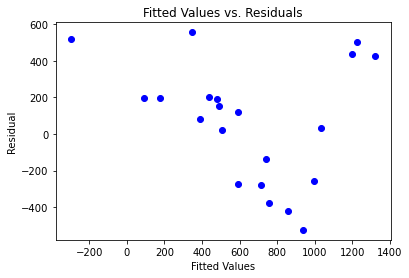

In [6]:
model = LinearRegression()
fitted_model = gmp.run_model_pipeline(train_data, 'totalco2', model, diagnostics=True)

### Prediction Model 2: Ridge Regression

In [20]:
X_train, X_test, y_train, y_test = gmp.get_X_y_stnd(train_data, 'totalco2', test_size=0.2, random_state=100)

alphas = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
gmp.linreg_kfold_cv(RidgeCV, X_train, X_test, y_train, y_test, alphas, random_state = 3, diagnostics=False)

optimal alpha: 10.0
Test MSE with cross-validated RidgeCV: 109752.23105372603
[R^2: 0.46342554817148174]


C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.15824e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.98885e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [21]:
alpha2 = np.arange(0, 30, 1)
gmp.linreg_kfold_cv(RidgeCV, X_train, X_test, y_train, y_test, alpha2, random_state = 3, diagnostics=False)

C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.15824e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.98885e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


optimal alpha: 24
Test MSE with cross-validated RidgeCV: 119400.50805632018
[R^2: 0.41625549163547937]


In [24]:
model2 = Ridge(alpha=24)
model2.fit(X_train, y_train)

preds_train = model2.predict(X_train)
mse_train = mean_squared_error(preds_train, y_train.values)
print('[Train MSE:', str(np.round(mse_train, 4)) + ']')

r_2 = model2.score(X_test, y_test)
print('[Train R^2:', str(r_2) + ']')

# evaluate model
preds_test = model2.predict(X_test)
mse_test = mean_squared_error(preds_test, y_test.values)
print('[Test MSE:', str(np.round(mse_test, 4)) + ']')

r_2 = model2.score(X_test, y_test)
print('[Test R^2:', str(r_2) + ']')

[Train MSE: 80075.1046]
[Train R^2: 0.41625549163547937]
[Test MSE: 119400.5081]
[Test R^2: 0.41625549163547937]


---

## Interpretation and Conclusions (20 points)
In this section you must relate your modeling and forecasting results to your original prediction question.  You must:
1. Address a resource allocation question.  What do the answers mean? What advice would you give a decision maker on the basis of your results?  How might they allocate their resources differently with the results of your model?  Why should the reader care about your results?
2. Discuss caveats and / or reasons your results might be flawed.  No model is perfect, and understanding a model's imperfections is extremely important for the purpose of knowing how to interpret your results.  Often, we know the model output is wrong but we can assign a direction for its bias.  This helps to understand whether or not your answers are conservative.  

Shoot for 500-1000 words for this section.